<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue/blob/main/001_data_partitioning_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.02.20 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Data Partitioning**

### Contents

*   Raw Data
*   Reformat
*   Industries
    *   TSE 上市櫃公司產業別整理
    *   Initial data size
    *   分為金融業與非金融業*
*   Missing Value
    *   Months*
    *   Companies*
*   Final Data*



Modified*



In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **1. Raw Data**

資料名稱：月營收盈餘

資料期間：1988年1月至2023年01月

資料範圍：上市、櫃公司

資料來源：TEJ Company DB

In [ ]:
raw_data = pd.read_excel('/content/gdrive/MyDrive/論文/資料集/raw/198801-202301 上市櫃公司月營收.xlsx')
del raw_data["營收發布日"]
raw_data = raw_data[raw_data["公司"].str.contains('^[a-zA-Z]') == False] # 刪除指數
raw_data

,公司,年月,以合併為主單月營收(千元)
0,1101 台泥,2023/01,7325221
1,1102 亞泥,2023/01,4814494
2,1103 嘉泥,2023/01,191217
3,1104 環泥,2023/01,504378
4,1108 幸福,2023/01,294901
...,...,...,...
458474,2904 匯僑,1988/01,214318
458475,2905 三商,1988/01,369403
458476,2913 農林,1988/01,80869
458477,2915 潤泰全,1988/01,145709


## **2. Reformat**

In [ ]:
# Change "Y/m" into "Y-m"
raw_data['年月'] = raw_data['年月'].str.replace('/','-')
raw_data

,公司,年月,以合併為主單月營收(千元)
0,1101 台泥,2023-01,7325221
1,1102 亞泥,2023-01,4814494
2,1103 嘉泥,2023-01,191217
3,1104 環泥,2023-01,504378
4,1108 幸福,2023-01,294901
...,...,...,...
458474,2904 匯僑,1988-01,214318
458475,2905 三商,1988-01,369403
458476,2913 農林,1988-01,80869
458477,2915 潤泰全,1988-01,145709


In [ ]:
# Replace "-" in "以合併為主單月營收(千元)" with NaN
raw_data['以合併為主單月營收(千元)'] = raw_data['以合併為主單月營收(千元)'].replace('-', np.NaN)

In [ ]:
# Check if there is NaN in each column
raw_data_nan = pd.DataFrame(raw_data.isnull().sum(), columns=['nan_count'])
raw_data_nan['nan_percent'] = raw_data_nan['nan_count'] / len(raw_data)
raw_data_nan

,nan_count,nan_percent
公司,0,0.000000
年月,0,0.000000
以合併為主單月營收(千元),651,0.001471


In [ ]:
# Pivot table
raw_data_pvt = raw_data.pivot_table(values='以合併為主單月營收(千元)', 
		                                index='公司', 
	   	                              columns='年月')
del raw_data_pvt['2023-01']  # delete 2023-01
raw_data_pvt

年月,1988-01,1988-02,1988-03,1988-04,1988-05,1988-06,1988-07,1988-08,1988-09,1988-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,1023366.0,776330.0,949653.0,934508.0,956722.0,962288.0,965689.0,906975.0,867808.0,962648.0,...,9971650.0,8319342.0,7733787.0,9145989.0,10102468.0,10689860.0,10404901.0,11368096.0,9674576.0,12584154.0
1102 亞泥,669609.0,469482.0,623179.0,670191.0,769070.0,668979.0,677471.0,658859.0,625047.0,602687.0,...,8160414.0,8710220.0,8000427.0,7776413.0,7864622.0,7069221.0,6994078.0,7601097.0,8306062.0,8340507.0
1103 嘉泥,274577.0,193507.0,248228.0,237091.0,258996.0,231139.0,234409.0,229682.0,208783.0,294174.0,...,220463.0,168089.0,163521.0,183177.0,178825.0,182371.0,205264.0,209429.0,221763.0,228644.0
1104 環泥,218501.0,142580.0,186419.0,185271.0,200967.0,207478.0,179686.0,156646.0,155726.0,228700.0,...,591593.0,638493.0,537082.0,573028.0,580420.0,605512.0,597159.0,634981.0,631827.0,725055.0
1108 幸福,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,345612.0,335518.0,332258.0,334113.0,326691.0,390053.0,346635.0,401202.0,383773.0,418326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,374229.0,302262.0,323433.0,371791.0,337581.0,468608.0,464373.0,432835.0,500111.0,506796.0
9955 佳龍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96200.0,101850.0,95096.0,80726.0,85625.0,81881.0,79179.0,80630.0,91270.0,84115.0
9958 世紀鋼,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,626104.0,401960.0,673479.0,665459.0,651699.0,757968.0,903198.0,911834.0,944060.0,1082675.0


## **3. Industries**



### 3.1 TSE 上市櫃公司產業別整理

In [ ]:
industry = pd.read_excel('/content/gdrive/MyDrive/論文/資料集/raw/上市櫃公司產業別20230211.xlsx', usecols=["公司簡稱","TSE 產業別","TSE舊產業_名稱","TSE新產業_名稱"])
industry

,公司簡稱,TSE 產業別,TSE舊產業_名稱,TSE新產業_名稱
0,1101 台泥,1,水泥工業,水泥工業
1,1102 亞泥,1,水泥工業,水泥工業
2,1103 嘉泥,1,水泥工業,水泥工業
3,1104 環泥,1,水泥工業,水泥工業
4,1108 幸福,1,水泥工業,水泥工業
...,...,...,...,...
1783,9949 琉園,32,文化創意業,文化創意業
1784,9950 萬國通,3,塑膠工業,塑膠工業
1785,9951 皇田,5,電機機械,電機機械
1786,9960 邁達康,18,貿易百貨,貿易百貨


In [ ]:
# 新產業名稱整理
industry.loc[industry['TSE新產業_名稱'].isna(), 'TSE新產業_名稱'] = industry['TSE舊產業_名稱']
industry

,公司簡稱,TSE 產業別,TSE舊產業_名稱,TSE新產業_名稱
0,1101 台泥,1,水泥工業,水泥工業
1,1102 亞泥,1,水泥工業,水泥工業
2,1103 嘉泥,1,水泥工業,水泥工業
3,1104 環泥,1,水泥工業,水泥工業
4,1108 幸福,1,水泥工業,水泥工業
...,...,...,...,...
1783,9949 琉園,32,文化創意業,文化創意業
1784,9950 萬國通,3,塑膠工業,塑膠工業
1785,9951 皇田,5,電機機械,電機機械
1786,9960 邁達康,18,貿易百貨,貿易百貨


In [ ]:
# Check if there is any company not in the TSE industry list
company = list(raw_data_pvt.index)
company_check = [c for c in company if c not in industry['公司簡稱'].tolist()]
print(len(company_check))
company_check

0


[]

In [ ]:
# 產業別
industryCounts = industry[['TSE新產業_名稱']].value_counts().rename_axis('TSE產業').reset_index(name='counts')
industryCounts

,TSE產業,counts
0,電子零組件,204
1,半導體,175
2,其他,137
3,生技醫療,129
4,光電業,117
5,電腦及週邊,109
6,電機機械,96
7,通信網路業,92
8,其他電子業,88
9,建材營造,79


### 3.2 Initial data size

In [ ]:
print(raw_data_pvt.shape) # Number of companies and months
print(raw_data_pvt.size)

(1780, 420)
747600


### 3.3 分為金融業與非金融業*
data_fin & data_nonfin

In [ ]:
# Industry filter
def industryFilter(originalD: pd.DataFrame, cList: list):
  filter = originalD.index.isin(cList)
  newD = originalD.loc[filter,:]
  print("Data shape:", newD.shape) # Number of companies and months
  print("Data size:", newD.size)
  return newD

In [ ]:
# 金融業
finList = industry[industry['TSE新產業_名稱'] == '金融業']['公司簡稱'].tolist()
data_fin = industryFilter(raw_data_pvt, finList)

Data shape: (42, 420)
Data size: 17640


In [ ]:
# 非金融業
nonfinList = industry[industry['TSE新產業_名稱'] != '金融業']['公司簡稱'].tolist()
data_nonfin = industryFilter(raw_data_pvt, nonfinList)

Data shape: (1738, 420)
Data size: 729960


## **4. Missing Value**

### **4.1 Months**

#### 4.1.1 Check if there is NaN in each month

In [ ]:
# Check if there is NaN in each month
month_nan = pd.DataFrame(raw_data_pvt.isnull().sum(), columns=['nan_count'])
month_nan['nan_percent'] = month_nan['nan_count'] / len(raw_data_pvt)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
  print(month_nan)

         nan_count  nan_percent
年月                             
1988-01       1684     0.946067
1988-02       1684     0.946067
1988-03       1683     0.945506
1988-04       1683     0.945506
1988-05       1682     0.944944
1988-06       1682     0.944944
1988-07       1682     0.944944
1988-08       1682     0.944944
1988-09       1680     0.943820
1988-10       1677     0.942135
1988-11       1673     0.939888
1988-12       1669     0.937640
1989-01       1665     0.935393
1989-02       1665     0.935393
1989-03       1665     0.935393
1989-04       1664     0.934831
1989-05       1664     0.934831
1989-06       1662     0.933708
1989-07       1660     0.932584
1989-08       1657     0.930899
1989-09       1658     0.931461
1989-10       1657     0.930899
1989-11       1657     0.930899
1989-12       1651     0.927528
1990-01       1637     0.919663
1990-02       1637     0.919663
1990-03       1635     0.918539
1990-04       1633     0.917416
1990-05       1633     0.917416
1990-06 

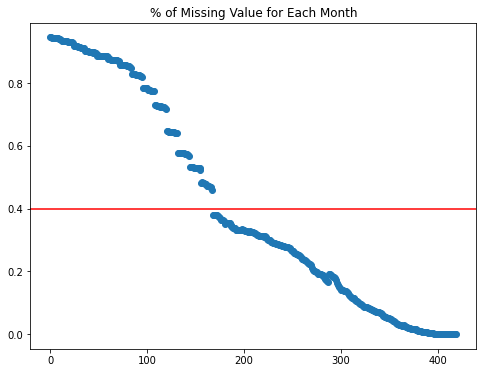

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(0, month_nan.shape[0]),month_nan['nan_percent'])
# plt.scatter(month_nan.index,month_nan['nan_percent'])
plt.axhline(y=0.4, color='r', linestyle='-')
plt.title("% of Missing Value for Each Month")
plt.show()

#### 4.1.2 Check if there is 0 in each month*

In [ ]:
# Check if there is 0 in each month
month_0 = pd.DataFrame((raw_data_pvt == 0).astype(int).sum(), columns=['zero_count'])
month_0['zero_percent'] = month_0['zero_count'] / len(raw_data_pvt)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
  print(month_0)

         zero_count  zero_percent
年月                               
1988-01           0      0.000000
1988-02           0      0.000000
1988-03           0      0.000000
1988-04           0      0.000000
1988-05           0      0.000000
1988-06           0      0.000000
1988-07           0      0.000000
1988-08           0      0.000000
1988-09           0      0.000000
1988-10           0      0.000000
1988-11           0      0.000000
1988-12           1      0.000562
1989-01           0      0.000000
1989-02           0      0.000000
1989-03           0      0.000000
1989-04           0      0.000000
1989-05           1      0.000562
1989-06           0      0.000000
1989-07           0      0.000000
1989-08           0      0.000000
1989-09           0      0.000000
1989-10           0      0.000000
1989-11           0      0.000000
1989-12           0      0.000000
1990-01           1      0.000562
1990-02           0      0.000000
1990-03           0      0.000000
1990-04       

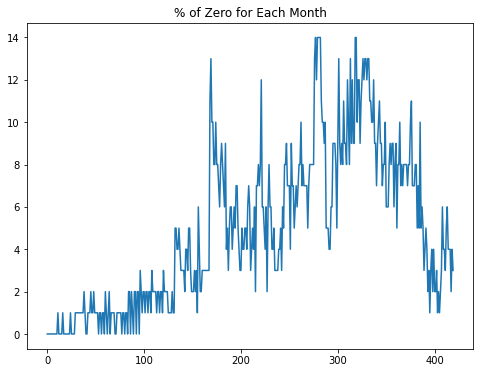

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
plt.plot(range(0, month_0.shape[0]),month_0['zero_count'])
# plt.scatter(month_0.index,month_0['zero_percent'])
plt.title("% of Zero for Each Month")
plt.show()

### **4.2 Companies***
data_fin0 & data_fin1

data_nonfin0 & data_nonfin1


#### 4.2.1 Functions

In [ ]:
# Check if there is NaN for each company
def companyNanCheck(df: pd.DataFrame):
  company_nan = pd.DataFrame(df.isnull().sum(axis=1), columns=['nan_count'])
  company_nan['nan_percent'] = company_nan['nan_count'] / len(df.columns)
  # Print the companies with NaN
  with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(company_nan[company_nan['nan_count'] != 0])

In [ ]:
# Count continuous NaN for each company
def countContigNan(originalD: pd.DataFrame):
  nanCountD = pd.DataFrame()
  for index, row in originalD.iterrows():
    mask = row.isna()
    d = originalD.columns[mask].to_series().groupby((~mask).cumsum()[mask]).agg(['first', 'size'])
    d = d.rename(columns=dict(size='Num of contig NaN', first='Start date')).reset_index(drop=True)
    d.insert(0, '公司', row.name)
    nanCountD = pd.concat([nanCountD, d]).reset_index(drop=True)
  
  return nanCountD

#### 4.2.2 金融業


In [ ]:
# Check if there is NaN for each company
companyNanCheck(data_fin)

           nan_count  nan_percent
公司                               
2816 旺旺保          39     0.092857
2820 華票           48     0.114286
2832 台產          104     0.247619
2834 臺企銀         107     0.254762
2836 高雄銀         111     0.264286
2838 聯邦銀          80     0.190476
2845 遠東銀          82     0.195238
2849 安泰銀          83     0.197619
2850 新產          136     0.323810
2851 中再保         136     0.323810
2852 第一保         141     0.335714
2855 統一證         108     0.257143
2867 三商壽         168     0.400000
2880 華南金         167     0.397619
2881 富邦金         167     0.397619
2882 國泰金         167     0.397619
2883 開發金         167     0.397619
2884 玉山金         168     0.400000
2885 元大金         169     0.402381
2886 兆豐金         169     0.402381
2887 台新金         169     0.402381
2888 新光金         169     0.402381
2889 國票金         170     0.404762
2890 永豐金         172     0.409524
2891 中信金         172     0.409524
2892 第一金         180     0.428571
2897 王道銀行        168     0.400000
5864 致和證      

In [ ]:
# Count continuous NaN for each company
fin_nan_count = countContigNan(data_fin)
fin_nan_count

,公司,Start date,Num of contig NaN
0,2816 旺旺保,1988-01,39
1,2820 華票,1988-01,48
2,2832 台產,1988-01,104
3,2834 臺企銀,1988-01,107
4,2836 高雄銀,1988-01,111
5,2838 聯邦銀,1988-01,80
6,2845 遠東銀,1988-01,82
7,2849 安泰銀,1988-01,83
8,2850 新產,1988-01,136
9,2851 中再保,1988-01,136


In [ ]:
# 非自 1988-01 開始連續缺值的公司
fin_nan_count1 = fin_nan_count[fin_nan_count['Start date'] != '1988-01']
# fin_nan_count1 = fin_nan_count1.sort_values(by=['Num of contig NaN'], ascending=False)
fin_nan_count1

,公司,Start date,Num of contig NaN
29,5876 上海商銀,1998-06,7
30,5876 上海商銀,1999-06,7
31,5876 上海商銀,2000-06,7
32,5876 上海商銀,2001-06,7
33,5876 上海商銀,2002-06,7
34,5876 上海商銀,2003-06,7
35,5876 上海商銀,2004-06,8
36,5876 上海商銀,2005-06,9
37,5876 上海商銀,2006-06,10
38,5876 上海商銀,2007-06,10


In [ ]:
# 依中間有缺值與否，分為兩個檔案
fin_nan_list = list(set(fin_nan_count1['公司'].tolist()))
data_fin0 = data_fin.loc[~data_fin.index.isin(fin_nan_list),:]
data_fin1 = data_fin.loc[data_fin.index.isin(fin_nan_list),:]
print(data_fin0.shape)
print(data_fin1.shape)

(40, 420)
(2, 420)


#### 4.2.3 非金融業


In [ ]:
# Check if there is NaN for each company
companyNanCheck(data_nonfin)

                nan_count  nan_percent
公司                                    
1108 幸福                17     0.040476
1109 信大                34     0.080952
1110 東泥                48     0.114286
1217 愛之味                9     0.021429
1218 泰山                10     0.023810
1219 福壽                23     0.054762
1220 台榮                24     0.057143
1225 福懋油               27     0.064286
1227 佳格                42     0.100000
1231 聯華食               60     0.142857
1232 大統益               84     0.200000
1233 天仁                98     0.233333
1234 黑松               120     0.285714
1235 興泰                48     0.114286
1236 宏亞                96     0.228571
1240 茂生農經             305     0.726190
1256 鮮活果汁-KY          287     0.683333
1258 其祥-KY            271     0.645238
1259 安心               263     0.626190
1264 德麥               298     0.709524
1268 漢來美食             319     0.759524
1313 聯成                 2     0.004762
1314 中石化               24     0.057143
1315 達新                40

In [ ]:
# Count continuous NaN for each company
nonfin_nan_count = countContigNan(data_nonfin)
nonfin_nan_count

,公司,Start date,Num of contig NaN
0,1108 幸福,1988-01,17
1,1109 信大,1988-01,34
2,1110 東泥,1988-01,48
3,1217 愛之味,1988-01,9
4,1218 泰山,1988-01,10
...,...,...,...
1816,9951 皇田,1988-01,144
1817,9955 佳龍,1988-01,144
1818,9958 世紀鋼,1988-01,168
1819,9960 邁達康,1988-01,156


In [ ]:
# 非自 1988-01 開始連續缺值的公司
nonfin_nan_count1 = nonfin_nan_count[nonfin_nan_count['Start date'] != '1988-01']
# nonfin_nan_count1 = nonfin_nan_count1.sort_values(by=['Num of contig NaN'], ascending=False)
nonfin_nan_count1

,公司,Start date,Num of contig NaN
16,1240 茂生農經,2004-10,137
18,1256 鮮活果汁-KY,2011-01,6
19,1256 鮮活果汁-KY,2012-01,6
35,1337 再生-KY,2011-06,1
37,1338 廣華-KY,2010-12,1
...,...,...,...
1774,912000 晨訊科-DR,2011-12,10
1776,9802 鈺齊-KY,2012-01,8
1797,9930 中聯資源,1996-02,1
1801,9934 成霖,1997-05,1


In [ ]:
# 依中間有缺值與否，分為兩個檔案
nonfin_nan_list = list(set(nonfin_nan_count1['公司'].tolist()))
data_nonfin0 = data_nonfin.loc[~data_nonfin.index.isin(nonfin_nan_list),:]
data_nonfin1 = data_nonfin.loc[data_nonfin.index.isin(nonfin_nan_list),:]
print(data_nonfin0.shape)
print(data_nonfin1.shape)

(1595, 420)
(143, 420)


## **5. Output Data***



In [ ]:
# TSE 產業別整理
industry.to_excel('/content/gdrive/MyDrive/論文/資料集/上市櫃公司TSE產業.xlsx', index=False)

In [ ]:
# 金融業
data_fin.to_excel('/content/gdrive/MyDrive/論文/資料集/198801-202212上市櫃公司月營收_金融業.xlsx')
print("Data shape:", data_fin.shape)
print("Data size:", data_fin.size)

Data shape: (42, 420)
Data size: 17640


In [ ]:
# 金融業：中間無缺值與有缺值
data_fin0.to_excel('/content/gdrive/MyDrive/論文/資料集/198801-202212上市櫃公司月營收_金融業_中間無缺值.xlsx')
data_fin1.to_excel('/content/gdrive/MyDrive/論文/資料集/198801-202212上市櫃公司月營收_金融業_中間有缺值.xlsx')
print("Data shape:", data_fin0.shape)
print("Data shape:", data_fin1.shape)

Data shape: (40, 420)
Data shape: (2, 420)


In [ ]:
# 金融業：中間有缺失值的公司、年月整理
fin_nan_count1.to_excel('/content/gdrive/MyDrive/論文/資料集/上市櫃公司月營收_金融業_中間缺失整理.xlsx', index=False)
print("Data shape:", fin_nan_count1.shape)

Data shape: (15, 3)


In [ ]:
# 非金融業
data_nonfin.to_excel('/content/gdrive/MyDrive/論文/資料集/198801-202212上市櫃公司月營收_非金融業.xlsx')
print("Data shape:", data_nonfin.shape)
print("Data size:", data_nonfin.size)

Data shape: (1738, 420)
Data size: 729960


In [ ]:
# 非金融業：中間無缺值與有缺值
data_nonfin0.to_excel('/content/gdrive/MyDrive/論文/資料集/198801-202212上市櫃公司月營收_非金融業_中間無缺值.xlsx')
data_nonfin1.to_excel('/content/gdrive/MyDrive/論文/資料集/198801-202212上市櫃公司月營收_非金融業_中間有缺值.xlsx')
print("Data shape:", data_nonfin0.shape)
print("Data shape:", data_nonfin1.shape)

Data shape: (1595, 420)
Data shape: (143, 420)


In [ ]:
# 非金融業：中間有缺失值的公司、年月整理
nonfin_nan_count1.to_excel('/content/gdrive/MyDrive/論文/資料集/上市櫃公司月營收_非金融業_中間缺失整理.xlsx', index=False)
print("Data shape:", nonfin_nan_count1.shape)

Data shape: (176, 3)
